## Student Clustering / Grouping

This is a data challenge project I did for a tutoring company. 

The task was to find a way to group/cluster students given their performance data on some common questions, such that it would help the students learn.

The details of the data:

The spreadsheet contains data for one 37-question test section. Each row is a student response to a question in this section. Altogether, there are about 70,000 rows (or answers) from approximately 2,000 completions of this test section.
 
Below is a detailed explanation of each of the columns in the spreadsheet.
 
The first 7 columns are referring to the specific section that a student completed.
 
- UserSectionId – a unique identifier for the student and test section. This will be the same for a specific students’ answers to each of the 37 questions of this section.
- Duration – is the total number of seconds a student spent on this section
- totalDuration – is the total allotted time the student had to complete this section. Note that some students have a longer duration because some students get time and a half.
- Correct – refers to the number of correct answers for the student in this section.
- Incorrect – is the number of incorrect answers for the student in this section
- Blank -  is the number of questions that the student left blank in this section.
- QuestionCount – the number of questions in a section. This should always be 37 for this section.
 
The next set of columns refers to the specific question and the student’s answer.
 
- Answer – is the specific answer choice the student picked.
- Correct – is whether they got the question right.
- questionSectionId – is a reference for the specific question. For example, the 1st and 38th rows are the same question.
- Duration – is the number of seconds the student spent on this specific question.
- Flagged – indicates if a student flagged the question. Don’t waste time with this one please.
- Questiontype- also useless for this analysis

The next set of columns are groupings and taggings about that specific question. Again, these will repeat every 37 rows.
- Keywordid – refers to the keyword (see below)
- Keyword – is a categorization of the subject area tested by the question.
- Bankid – refers to the follow-up practice exercise bank that the question points to in our system. These are very specific, so there will likely be few overlaps.
- Bankdescription – is the title of the question bank (essentially a specific description of the type of question this is).
- Difficulty – is a 1-3 scale, where 1=easy, 2=medium, and 3=hard. We generate these based on a larger aggregate analysis of test questions, grouping them according to the percentage of students who answer them correctly.
- Familyid and family description are another version of grouping of questions. Not sure it will be too useful.


In [1]:
# %load ../standard_imports.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def list_unique_dtype(df):
    print("Unique values, type\n")
    for col in list(df.columns):
        print("{:20}: {:6}  {} ".format(col,df[col].unique().shape[0],df[col].dtype))

        
def plot_hist_and_box(data,nbins=10):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, ax=ax_box)
    sns.distplot(data, ax=ax_hist,bins=nbins)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
    plt.show()


In [3]:
dataset = pd.read_csv('usersections_revised_2 (1).csv')
print('row,column: '+str(dataset.shape))
dataset.head()

row,column: (70411, 20)


,userSectionId,duration,totalDuration,correct,incorrect,blank,questionCount,answer,correct.1,questionSectionId,duration.1,flagged,questionType,keywordId,keyword,bankId,bankDescription,difficulty,familyId,familyDescription
0,62341,1417,2100,14,23,0,37,c,0,6845,103,0,basic,6,Algebraic Concepts,135,Solving for Missing Constants with FOIL,3,42,QUADRATIC EQUATIONS
1,62341,1417,2100,14,23,0,37,a,1,6846,37,0,basic,18,Number Properties,95,"Max/Min of Quadratic Expression, given Domain",3,42,QUADRATIC EQUATIONS
2,62341,1417,2100,14,23,0,37,b,1,6847,63,0,basic,8,Data Analysis & Probability,141,Probability of Desired Sum of Independent Events,1,40,PROBABILITY
3,62341,1417,2100,14,23,0,37,b,0,6848,32,0,basic,6,Algebraic Concepts,134,Special (Symbol) Functions,2,22,FUNCTIONS
4,62341,1417,2100,14,23,0,37,d,1,6849,60,0,basic,9,Measurement,136,Interpreting Position vs. Time Graphs,1,25,LINE GRAPHS


In [4]:
#save keyword and bank description because these are going to be dropped later.
keywordId_map = dataset[['keywordId','keyword']].groupby(['keywordId','keyword']).count().copy()
bankId_map = dataset[['bankId','bankDescription','keyword']].groupby(['bankId','bankDescription','keyword']).count().copy()

In [5]:
keywordId_map

,
keywordId,keyword
6,Algebraic Concepts
7,Geometry
8,Data Analysis & Probability
9,Measurement
18,Number Properties


In [6]:
bankId_map

,,
bankId,bankDescription,keyword
31,Comparing Figures w. Variable Sides,Algebraic Concepts
40,"Perimeter of Triangle, given Area",Geometry
55,FOIL vs. Quadratic Expression,Algebraic Concepts
66,Comparing Volume of Spheres,Geometry
73,Estimating Square Roots,Number Properties
89,Comparing Exponential Expressions w. Variables,Algebraic Concepts
91,Sums in Terms of a Variable-Defined Set,Number Properties
95,"Max/Min of Quadratic Expression, given Domain",Number Properties
96,"Y-intercepts, given Graphs",Geometry


## 1. Drop some features.

In [7]:
list_unique_dtype(dataset)

Unique values, type

userSectionId       :   1903  int64 
duration            :    820  int64 
totalDuration       :      2  int64 
correct             :     36  int64 
incorrect           :     33  int64 
blank               :     19  int64 
questionCount       :      1  int64 
answer              :      5  object 
correct.1           :      2  int64 
questionSectionId   :     37  int64 
duration.1          :    469  int64 
flagged             :      2  int64 
questionType        :      1  object 
keywordId           :      5  int64 
keyword             :      5  object 
bankId              :     36  int64 
bankDescription     :     36  object 
difficulty          :      3  int64 
familyId            :     22  int64 
familyDescription   :     22  object 


Things that can be dropped
- questionCount : contains one value. 
- flagged : intstructed to ignore
- questionType : instructed to ignore
- keyword : duplicate info to id (value can be stored by map)
- bankDescription : duplicate info to id (value can be stored by map)
- familyId : serves the as function as bank description /id
- familyDescription : serves the as function as bank description /id

In [8]:
dataset_slim = dataset.drop(['questionCount','flagged','questionType','keyword','bankDescription','familyId','familyDescription'],axis=1)

## 2. New feature:  isBlank

In [9]:
dataset_slim['answer'].fillna('blank',inplace=True)

Remove "answers" because it doesn't add any additional information. "isBlank" is sufficient.

In [10]:
dataset_slim['isBlank'] = dataset_slim['answer'].apply(lambda x: 1 if x=='blank' else 0)
dataset_slim.drop(['answer'],axis=1,inplace=True)

## 3. Rename for clearer feature interpretation
s for section, q for question

In [11]:
dataset_slim_renamed = dataset_slim.rename({'duration':'s.duration','totalDuration':'s.allocated_time','correct':'s.correct','incorrect':'s.incorrect','blank':'s.blank','correct.1':'q.correct','duration.1':'q.duration','difficulty':'q.difficulty','isBlank':'q.isBlank'},axis='columns')

In [12]:
#looking at which bankId has double rows for a student. --> Discovered that bankId 566, has double rows per student. Un comment below to see. Just some thing to note.
# print('bankId | total rows')
# print('------ | ----------')
# for bankId in dataset_slim_renamed['bankId'].unique():
#     print('{:5}  | {:5}'.format(bankId,dataset_slim_renamed[dataset_slim_renamed['bankId']==bankId]['userSectionId'].shape[0]))

## 4. Reorder columns

In [13]:
dataset_slim_renamed = dataset_slim_renamed[['userSectionId', 's.duration', 's.allocated_time', 's.correct',
       's.incorrect', 's.blank', 'questionSectionId','q.duration','q.correct','q.difficulty', 'q.isBlank','bankId','keywordId']]

## 5. Preliminary analytics / some observations

### 5.1 The group that have normal allocated time

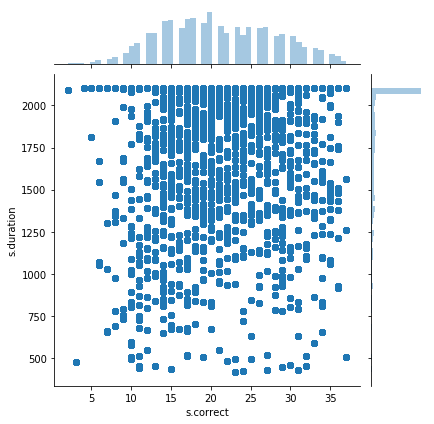

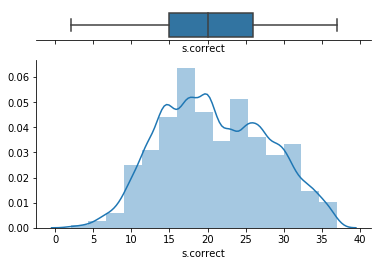

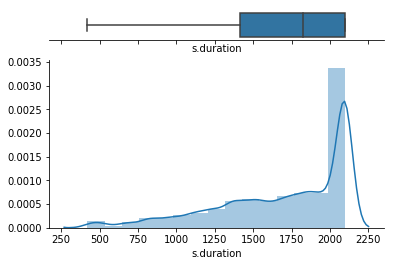

In [14]:
df_temp = dataset_slim_renamed[(dataset_slim_renamed['s.duration']>5) & (dataset_slim_renamed['s.allocated_time']==2100)]
sns.jointplot(x='s.correct',y='s.duration',data=df_temp)
plot_hist_and_box(df_temp['s.correct'],15)
plot_hist_and_box(df_temp['s.duration'],15)

On average students get about 20 correct answers and most students use up all the allocated time.

### 5.2 The group that have 1.5 x normal allocated time

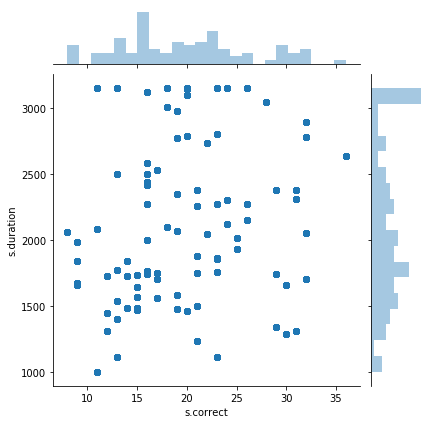

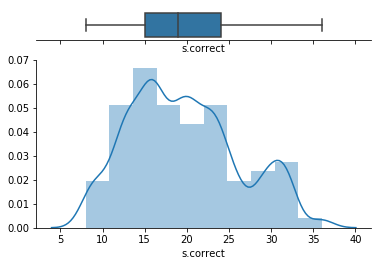

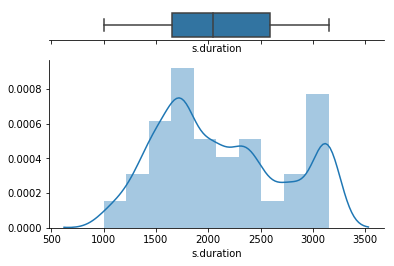

In [15]:
df_temp = dataset_slim_renamed[(dataset_slim_renamed['s.duration']>5) & (dataset_slim_renamed['s.allocated_time']!=2100)]
sns.jointplot(x='s.correct',y='s.duration',data=df_temp)
plot_hist_and_box(df_temp['s.correct'],10)
plot_hist_and_box(df_temp['s.duration'],10)

This group has a lower average correct answers and mostly and on average use much less than the allocated time.

### 5.3 Observations about s.duration per s.allocated_time

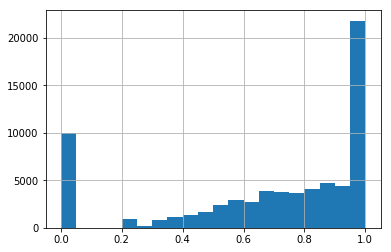

In [16]:
df_temp = dataset_slim_renamed['s.duration']/dataset_slim_renamed['s.allocated_time']
df_temp.hist(bins=20)

Why are there some people who finished in 0 seconds? Bad data points?

### 5.4 Possible bug: q.duration > 0 but s.duration = 0 ??

Why are there people who spent total 0 seconds in the section but non zero on the questions ?

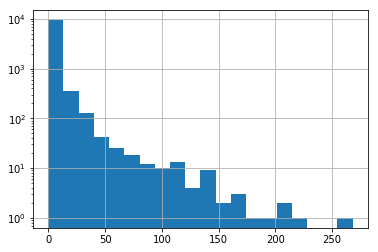

In [17]:
dataset_slim_renamed[dataset_slim_renamed['s.duration']==0]['q.duration'].hist(bins=20,log=True)

In [18]:
denom = dataset_slim_renamed[dataset_slim_renamed['s.duration']==0]['q.duration'].shape[0]
num = dataset_slim_renamed[(dataset_slim_renamed['s.duration']==0)&(dataset_slim_renamed['q.duration']<10)]['q.duration'].shape[0]
print('There are {} cases where 0 seconds were spent in the section but non zero on the question. Bad data points ?'.format(denom))
print('But most of them ({}%) spent less than 10 seconds on the question'.format(round(num/denom * 100,2)))

There are 10027 cases where 0 seconds were spent in the section but non zero on the question. Bad data points ?
But most of them (89.81%) spent less than 10 seconds on the question


We will replace s.duration with sum of q.duration, which seems more reliable.

# Create table of 1 student per row

idea:  studentId | section performance | q1 performance | q2 performance | ... | q37 performance |  q info |

## 6. Rescale question numbering 
(just for aesthetics) so questions go from 1 to 37

In [19]:
dataset_slim_renamed['questionSectionId']=dataset_slim_renamed['questionSectionId']-6844

## 7. New feature: q.corr_x_diff
Weight q.correct by the difficulty. (We can drop "difficulty")

In [20]:
dataset_slim_renamed['q.corr_x_diff']=dataset_slim_renamed['q.correct']*dataset_slim_renamed['q.difficulty']

## 8. New feature: q.dur_per_alloTime 

Normalize duration by allocated time so we can have durations that are comparable accross all students. 

In [21]:
dataset_slim_renamed['q.dur_per_alloTime']=dataset_slim_renamed['q.duration']/(dataset_slim_renamed['s.allocated_time'])
dataset_slim_renamed.head(5)

,userSectionId,s.duration,s.allocated_time,s.correct,s.incorrect,s.blank,questionSectionId,q.duration,q.correct,q.difficulty,q.isBlank,bankId,keywordId,q.corr_x_diff,q.dur_per_alloTime
0,62341,1417,2100,14,23,0,1,103,0,3,0,135,6,0,0.049048
1,62341,1417,2100,14,23,0,2,37,1,3,0,95,18,3,0.017619
2,62341,1417,2100,14,23,0,3,63,1,1,0,141,8,1,0.030000
3,62341,1417,2100,14,23,0,4,32,0,2,0,134,6,0,0.015238
4,62341,1417,2100,14,23,0,5,60,1,1,0,136,9,1,0.028571


## 9. Make groups based on topic/keywordId, questionType/bankId

Aggregate correct, corr_x_diff, blank, duration, duration_per_allocatedTime -- for each groups 

In [22]:
#per keywordId
m_keyId_dataset_slim_renamed = {}
m_agg_keyId_dataset_slim_renamed = {}
for Id in dataset_slim_renamed.keywordId.unique():
    m_keyId_dataset_slim_renamed[Id] = dataset_slim_renamed[dataset_slim_renamed['keywordId']==Id]
    m_agg_keyId_dataset_slim_renamed[Id] = m_keyId_dataset_slim_renamed[Id][['userSectionId','q.correct','q.corr_x_diff','q.isBlank','q.duration']].groupby('userSectionId').agg('sum')
    m_agg_keyId_dataset_slim_renamed[Id].columns = ['keyId'+str(Id)+'.correct','keyId'+str(Id)+'.corr_x_diff','keyId'+str(Id)+'.isBlank','keyId'+str(Id)+'.duration']
    m_agg_keyId_dataset_slim_renamed[Id]['keyId'+str(Id)+'.allocatedTime'] = m_keyId_dataset_slim_renamed[Id][['userSectionId','s.allocated_time']].groupby('userSectionId').agg('max')['s.allocated_time']
    m_agg_keyId_dataset_slim_renamed[Id]['keyId'+str(Id)+'.dur_per_alloTime'] = m_agg_keyId_dataset_slim_renamed[Id]['keyId'+str(Id)+'.duration'] / m_agg_keyId_dataset_slim_renamed[Id]['keyId'+str(Id)+'.allocatedTime'] 
    m_agg_keyId_dataset_slim_renamed[Id].drop(columns=['keyId'+str(Id)+'.allocatedTime'],inplace=True)

In [23]:
#per bankId
m_bankId_dataset_slim_renamed = {}
m_agg_bankId_dataset_slim_renamed = {}
for Id in dataset_slim_renamed.bankId.unique():
    m_bankId_dataset_slim_renamed[Id] = dataset_slim_renamed[dataset_slim_renamed['bankId']==Id]
    m_agg_bankId_dataset_slim_renamed[Id] = m_bankId_dataset_slim_renamed[Id][['userSectionId','q.correct','q.corr_x_diff','q.isBlank','q.duration']].groupby('userSectionId').agg('sum')
    m_agg_bankId_dataset_slim_renamed[Id].columns = ['bankId'+str(Id)+'.correct','bankId'+str(Id)+'.corr_x_diff','bankId'+str(Id)+'.isBlank','bankId'+str(Id)+'.duration']
    m_agg_bankId_dataset_slim_renamed[Id]['bankId'+str(Id)+'.allocatedTime'] = m_bankId_dataset_slim_renamed[Id][['userSectionId','s.allocated_time']].groupby('userSectionId').agg('max')['s.allocated_time']
    m_agg_bankId_dataset_slim_renamed[Id]['bankId'+str(Id)+'.dur_per_alloTime'] = m_agg_bankId_dataset_slim_renamed[Id]['bankId'+str(Id)+'.duration'] / m_agg_bankId_dataset_slim_renamed[Id]['bankId'+str(Id)+'.allocatedTime'] 
    m_agg_bankId_dataset_slim_renamed[Id].drop(columns=['bankId'+str(Id)+'.allocatedTime'],inplace=True)

Eg. The number of questions correct in the topic of Algebra (keyId6): keyId6.correct, etc.

In [24]:
keywordId_map.loc[6,:]

""
keyword
Algebraic Concepts


In [25]:
m_agg_keyId_dataset_slim_renamed[6].head()

,keyId6.correct,keyId6.corr_x_diff,keyId6.isBlank,keyId6.duration,keyId6.dur_per_alloTime
userSectionId,,,,,
62341,2,5,0,320,0.152381
63782,8,22,0,102,0.048571
64774,7,20,0,482,0.229524
65152,1,3,0,31,0.014762
65193,7,20,0,470,0.223810


Eg. The number of questions correct in the "Perimeter of Triangle, given Area" (bankId31): bankId31.correct, etc.

In [26]:
bankId_map.loc[40,:]

,
bankDescription,keyword
"Perimeter of Triangle, given Area",Geometry


In [27]:
m_agg_bankId_dataset_slim_renamed[40].head(5)

,bankId40.correct,bankId40.corr_x_diff,bankId40.isBlank,bankId40.duration,bankId40.dur_per_alloTime
userSectionId,,,,,
62341,1,3,0,18,0.008571
63782,0,0,0,7,0.003333
64774,1,3,0,79,0.037619
65152,0,0,0,3,0.001429
65193,0,0,0,36,0.017143


## 10. Pivot / reorganize table

( such that becomes table of student per row )

In [28]:
index_to_pivot = ['userSectionId','s.correct','s.incorrect','s.blank','s.duration','s.allocated_time']
col_to_pivot = 'questionSectionId'
values_to_pivot = ['q.duration','q.isBlank','q.corr_x_diff']

df_pivot = dataset_slim_renamed.pivot_table(index=index_to_pivot,columns=col_to_pivot,values=values_to_pivot)

df_pivot.columns = [str(col[0]).split('.')[0]+str(col[1])+'.'+str(col[0]).split('.')[1] for col in df_pivot.columns.to_list()]
df_pivot_flat = df_pivot.reset_index(['s.correct','s.incorrect','s.blank','s.duration','s.allocated_time'])
df_pivot_flat.head()

,s.correct,s.incorrect,s.blank,s.duration,s.allocated_time,q1.corr_x_diff,q2.corr_x_diff,q3.corr_x_diff,q4.corr_x_diff,q5.corr_x_diff,...,q28.isBlank,q29.isBlank,q30.isBlank,q31.isBlank,q32.isBlank,q33.isBlank,q34.isBlank,q35.isBlank,q36.isBlank,q37.isBlank
userSectionId,,,,,,,,,,,,,,,,,,,,,
62341,14,23,0,1417,2100,0,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
63782,25,12,0,0,2100,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
64774,27,10,0,2100,2100,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
65152,8,29,0,0,2100,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
65193,26,11,0,2100,2100,3,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## 11. New feature: s.duration_qsum 
(Total duration in the section by summing q.duration)

In [29]:
q_dur_col = ['q'+str(x)+'.duration' for x in range(1,38)]
df_pivot_flat_duration = df_pivot_flat[q_dur_col]

new_col_dur = df_pivot_flat_duration.sum(axis=1)  # sum q durations   
df_pivot_flat.insert(loc=4, column='s.duration_qsum', value=new_col_dur)

## 12. New feature: s.corr_x_diff 
(Multiply/weight total correct by difficulty)

In [30]:
q_corr_diff = ['q'+str(x)+'.corr_x_diff' for x in range(1,38)]
df_pivot_flat_corr_diff = df_pivot_flat[q_corr_diff]

new_col_corr_diff = df_pivot_flat_corr_diff.sum(axis=1)  # sum q corr * diff
df_pivot_flat.insert(loc=0, column='s.corr_x_diff', value=new_col_corr_diff)

## 13. New feature: s.correct_d1,2,3 
(Number of correct questions per difficulty)

In [31]:
df_correct_d123 = dataset_slim_renamed.groupby(['userSectionId','q.difficulty']).sum()[['q.correct']]

index_to_pivot = ['userSectionId']
col_to_pivot = 'q.difficulty'
values_to_pivot = ['q.correct']
df_correct_d123_pivot = df_correct_d123.pivot_table(index=index_to_pivot,columns=col_to_pivot,values=values_to_pivot)

df_correct_d123_cols = ['s.correct_d1','s.correct_d2','s.correct_d3']
df_correct_d123_pivot.columns = df_correct_d123_cols

# add to main pivoted table
for col in reversed(df_correct_d123_cols):
    df_pivot_flat.insert(loc=2, column=col, value=df_correct_d123_pivot[col])


## 14. New feature: s.dur_per_alloTime
Total duration (by summing duration per question), divided by s.allocated time

In [32]:
dur_qsum_per_alloTime = df_pivot_flat['s.duration_qsum']/df_pivot_flat['s.allocated_time']
df_pivot_flat.insert(loc=1, column='s.dur_per_alloTime', value=dur_qsum_per_alloTime)

## 15. Put the topic grouped tables with final table

In [33]:
for Id in sorted(dataset_slim_renamed.keywordId.unique()):
    df_pivot_flat = df_pivot_flat.join(m_agg_keyId_dataset_slim_renamed[Id])    

for Id in sorted(dataset_slim_renamed.bankId.unique()):
    df_pivot_flat = df_pivot_flat.join(m_agg_bankId_dataset_slim_renamed[Id])        

## 16. Resulting features/columns

In [34]:
df_pivot_flat.columns.to_list()

['s.corr_x_diff',
 's.dur_per_alloTime',
 's.correct',
 's.correct_d1',
 's.correct_d2',
 's.correct_d3',
 's.incorrect',
 's.blank',
 's.duration',
 's.duration_qsum',
 's.allocated_time',
 'q1.corr_x_diff',
 'q2.corr_x_diff',
 'q3.corr_x_diff',
 'q4.corr_x_diff',
 'q5.corr_x_diff',
 'q6.corr_x_diff',
 'q7.corr_x_diff',
 'q8.corr_x_diff',
 'q9.corr_x_diff',
 'q10.corr_x_diff',
 'q11.corr_x_diff',
 'q12.corr_x_diff',
 'q13.corr_x_diff',
 'q14.corr_x_diff',
 'q15.corr_x_diff',
 'q16.corr_x_diff',
 'q17.corr_x_diff',
 'q18.corr_x_diff',
 'q19.corr_x_diff',
 'q20.corr_x_diff',
 'q21.corr_x_diff',
 'q22.corr_x_diff',
 'q23.corr_x_diff',
 'q24.corr_x_diff',
 'q25.corr_x_diff',
 'q26.corr_x_diff',
 'q27.corr_x_diff',
 'q28.corr_x_diff',
 'q29.corr_x_diff',
 'q30.corr_x_diff',
 'q31.corr_x_diff',
 'q32.corr_x_diff',
 'q33.corr_x_diff',
 'q34.corr_x_diff',
 'q35.corr_x_diff',
 'q36.corr_x_diff',
 'q37.corr_x_diff',
 'q1.duration',
 'q2.duration',
 'q3.duration',
 'q4.duration',
 'q5.duration',

## 17 Sanity checks.

Sort to see of it makes sense

In [35]:
df_pivot_flat.sort_values(by=['s.corr_x_diff','s.correct','s.incorrect','s.blank','s.duration_qsum'],ascending=[False,False,True,True,True]).head(10)

,s.corr_x_diff,s.dur_per_alloTime,s.correct,s.correct_d1,s.correct_d2,s.correct_d3,s.incorrect,s.blank,s.duration,s.duration_qsum,...,bankId624.correct,bankId624.corr_x_diff,bankId624.isBlank,bankId624.duration,bankId624.dur_per_alloTime,bankId636.correct,bankId636.corr_x_diff,bankId636.isBlank,bankId636.duration,bankId636.dur_per_alloTime
userSectionId,,,,,,,,,,,,,,,,,,,,,
107216,86,0.092857,37,8,9,20,0,0,0,195,...,1,3,0,6,0.002857,1,2,0,6,0.002857
128756,86,0.103810,37,8,9,20,0,0,0,218,...,1,3,0,3,0.001429,1,2,0,4,0.001905
159880,86,0.111905,37,8,9,20,0,0,0,235,...,1,3,0,10,0.004762,1,2,0,14,0.006667
84038,86,0.143333,37,8,9,20,0,0,0,301,...,1,3,0,3,0.001429,1,2,0,5,0.002381
131630,86,0.159048,37,8,9,20,0,0,0,334,...,1,3,0,5,0.002381,1,2,0,9,0.004286
127916,86,0.188095,37,8,9,20,0,0,0,395,...,1,3,0,8,0.003810,1,2,0,5,0.002381
103943,86,0.241905,37,8,9,20,0,0,508,508,...,1,3,0,3,0.001429,1,2,0,4,0.001905
95841,86,0.599048,37,8,9,20,0,0,1258,1258,...,1,3,0,25,0.011905,1,2,0,12,0.005714
111075,86,0.745238,37,8,9,20,0,0,1565,1565,...,1,3,0,13,0.006190,1,2,0,42,0.020000


In [36]:
df_pivot_flat[df_pivot_flat['s.duration_qsum']==0][['s.corr_x_diff','s.duration_qsum']].head()

,s.corr_x_diff,s.duration_qsum
userSectionId,,
65759,24,0
65789,52,0
66416,55,0
66427,38,0
66471,58,0


What is happening here? Why are there students who spent 0 seconds on section/questions but got relatively good scores??

##  17. Remove outliers: ( 0 sec duration with good scores ) 
For the moment treat as bad data points

In [37]:
num_zero_seconds_duration = df_pivot_flat[df_pivot_flat['s.duration_qsum']==0].shape[0]/df_pivot_flat.shape[0]
print ('There are {} % of entries with 0 seconds on every question'.format(round(num_zero_seconds_duration*100,2)))

#remove students who spent zero seconds on all questions
df_pivot_flat_no_zero = df_pivot_flat[df_pivot_flat['s.duration_qsum']!=0]

There are 4.83 % of entries with 0 seconds on every question


## 18. Remove outliers: Entries who spent more than allocated time

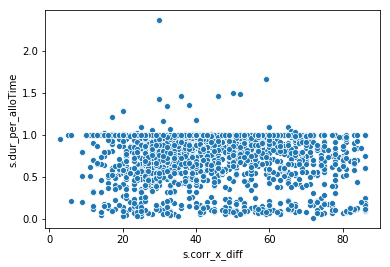

In [38]:
ax = sns.scatterplot(x="s.corr_x_diff", y="s.dur_per_alloTime", data=df_pivot_flat_no_zero)

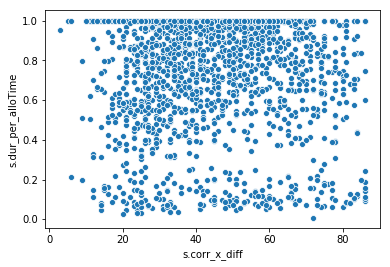

In [39]:
df_pivot_flat_no_outl = df_pivot_flat_no_zero[df_pivot_flat_no_zero['s.dur_per_alloTime']<=1]
ax = sns.scatterplot(x="s.corr_x_diff", y="s.dur_per_alloTime", data=df_pivot_flat_no_outl)

## 19. Make subset of features to process

In [40]:
# features = ['s.corr_x_diff', 's.correct']+df_correct_d123_cols+df_correct_keyId_cols+df_correct_bankId_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime','s.duration_qsum']
# features = ['s.corr_x_diff', 's.correct']+df_correct_d123_cols+df_correct_keyId_cols+df_correct_bankId_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime']
# features = ['s.corr_x_diff', 's.correct']+df_correct_d123_cols+df_correct_keyId_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime','s.duration_qsum']
# features = ['s.corr_x_diff', 's.correct']+df_correct_d123_cols+df_correct_keyId_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime']
# features = ['s.corr_x_diff']+df_correct_d123_cols+df_correct_keyId_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime']
features = ['s.corr_x_diff', 's.correct']+df_correct_d123_cols+['s.incorrect', 's.blank', 's.dur_per_alloTime','s.duration_qsum']

for Id in dataset_slim_renamed.keywordId.unique():
    features += m_agg_keyId_dataset_slim_renamed[Id].columns.to_list()    

df_to_cluster_all  = df_pivot_flat_no_outl[features]

## 20. Separate between ones that have extra time and those with normal time

In [41]:
df_to_cluster_norm = df_pivot_flat_no_outl[df_pivot_flat_no_outl['s.allocated_time']==2100][features]
df_to_cluster_extr = df_pivot_flat_no_outl[df_pivot_flat_no_outl['s.allocated_time']>2100][features]

## 21. Rescale to mean=0 std=1

In [42]:
def MyStandarScaler(df):
    for col in df.columns.to_list():
        df[col] -= df[col].mean()
        df[col] /= df[col].std()
    return df

df_to_cluster_all  = MyStandarScaler(df_to_cluster_all)
df_to_cluster_norm  = MyStandarScaler(df_to_cluster_norm)
df_to_cluster_extr  = MyStandarScaler(df_to_cluster_extr)

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 22. Analysis: PCA
principal component analysis -- to see if maybe we can reduce the dimensions and see what features is most correlated to the reduced dimension

https://en.wikipedia.org/wiki/Principal_component_analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

explained_variance_ratio_ [0.34861176 0.23668177]


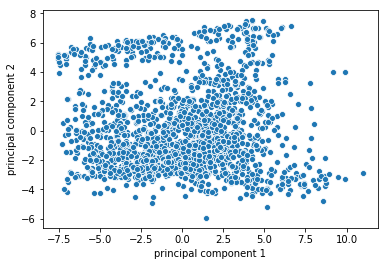

In [43]:
df_to_cluster_pca = df_to_cluster_all

from sklearn.decomposition import PCA

n_comp=2
pca = PCA(n_components=n_comp)

x = df_to_cluster_pca.loc[:, features].values

principalComponents = pca.fit_transform(x)

pca_cols = ['principal component {}'.format(x+1) for x in range(n_comp)]

pca_cols

principalDf = pd.DataFrame(data = principalComponents, columns = pca_cols, index=df_to_cluster_pca.index)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", data=principalDf)

print('explained_variance_ratio_ {}'.format(pca.explained_variance_ratio_))

In [44]:
df_to_cluster_pca['pca1'] = principalDf.iloc[:,0].values
df_to_cluster_pca['pca2'] = principalDf.iloc[:,1].values

df_to_cluster_pca_corr = df_to_cluster_pca.corr(method='pearson')

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
df_to_cluster_pca_corr['pca1'] = df_to_cluster_pca_corr['pca1'].round(4)
df_to_cluster_pca_corr['pca1_correlation_sign'] = df_to_cluster_pca_corr['pca1']/df_to_cluster_pca_corr['pca1'].abs()
df_to_cluster_pca_corr['pca1'] = df_to_cluster_pca_corr['pca1'].abs()
df_to_cluster_pca_corr[['pca1','pca1_correlation_sign']].sort_values(by=['pca1'],ascending=False)

,pca1,pca1_correlation_sign
pca1,1.0000,1.0
s.correct,0.9815,-1.0
s.corr_x_diff,0.9728,-1.0
s.correct_d3,0.9278,-1.0
keyId6.correct,0.8638,-1.0
keyId6.corr_x_diff,0.8613,-1.0
keyId18.correct,0.8390,-1.0
s.correct_d2,0.8238,-1.0
keyId18.corr_x_diff,0.8112,-1.0
keyId7.corr_x_diff,0.7765,-1.0


PCA component 1 is highly correlated with measure of correctness 

In [46]:
df_to_cluster_pca_corr['pca2'] = df_to_cluster_pca_corr['pca2'].round(4)
df_to_cluster_pca_corr['pca2_correlation_sign'] = df_to_cluster_pca_corr['pca2']/df_to_cluster_pca_corr['pca2'].abs()
df_to_cluster_pca_corr['pca2'] = df_to_cluster_pca_corr['pca2'].abs()
df_to_cluster_pca_corr[['pca2','pca2_correlation_sign']].sort_values(by=['pca2'],ascending=False)

,pca2,pca2_correlation_sign
pca2,1.0000,1.0
s.dur_per_alloTime,0.9707,-1.0
s.duration_qsum,0.9664,-1.0
keyId8.dur_per_alloTime,0.8271,-1.0
keyId8.duration,0.8269,-1.0
keyId18.dur_per_alloTime,0.8086,-1.0
keyId18.duration,0.8052,-1.0
keyId6.dur_per_alloTime,0.7418,-1.0
keyId6.duration,0.7357,-1.0
keyId9.dur_per_alloTime,0.7332,-1.0


PCA component 2 is highly correlated with time performance

Conclusion : Measure of number of correct answers and performance in time are the features that maximizes variance.  

## 23. Clustering: DBSCAN

Density based clustering technique

https://en.wikipedia.org/wiki/DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [47]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [48]:
def do_DBSCAN(x,xlabel,ylabel,eps_loop,min_sample_loop):
    # #############################################################################
    # Compute DBSCAN

    for i_eps in eps_loop:
        for i_min_sam in min_sample_loop:
            db = DBSCAN(eps=i_eps, min_samples=i_min_sam).fit(x)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            print('eps: {}, min samples: {}'.format(str(i_eps),str(i_min_sam)))
            print('\tEstimated number of clusters: %d' % n_clusters_)
            print('\tEstimated number of noise points: %d' % n_noise_)
            print("\tSilhouette Coefficient: %0.3f"% metrics.silhouette_score(x, labels))

    # #############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = x[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = x[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### 23.1. Take pca as input

eps: 0.4, min samples: 5
	Estimated number of clusters: 29
	Estimated number of noise points: 202
	Silhouette Coefficient: -0.261


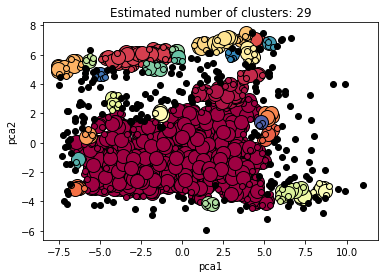

In [49]:
do_DBSCAN(principalComponents,'pca1','pca2',[0.4],[5])

The Silhouette Coeff score is between (-1,1). Here, it indicates that the clustering is not really good. (towards 1 means the points are much more like the the cluster they belong to compared to other clusters.)

Clustering not intuitive.

### 23.2. Take original dataset as input

eps: 0.2, min samples: 9
	Estimated number of clusters: 5
	Estimated number of noise points: 141
	Silhouette Coefficient: 0.304


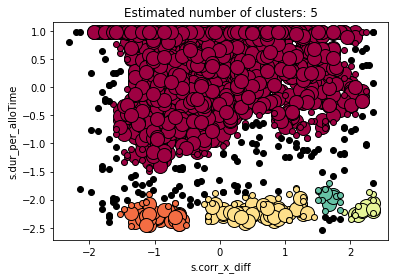

In [50]:
x_,y_ = 's.corr_x_diff','s.dur_per_alloTime'
do_DBSCAN(df_to_cluster_all[[x_,y_]].values,x_,y_,[0.2],[9])

The Silhouette Coeff score indicates that the clustering is much better than the PCA input.

## 24. Clustering: Gaussian Mixture

In [51]:
from sklearn.mixture import GaussianMixture

In [52]:
def do_GMM(gmm_data,x_col_index,y_col_index,x_label,y_label,n_comp):

    print('Input dimension: {}, nCluster: {}'.format(gmm_data.shape[1],n_comp))

    gmm = GaussianMixture(n_components=n_comp,covariance_type="full").fit(gmm_data)

    labels = gmm.predict(gmm_data)


    plt.scatter(gmm_data[:, x_col_index], gmm_data[:, y_col_index], c=labels, s=40, cmap='viridis');
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    probs = gmm.predict_proba(gmm_data)
    
    print('sample prediction:\n', probs[:5].round(3))

### 24.1. Take PCA components as input

Input dimension: 2, nCluster: 5


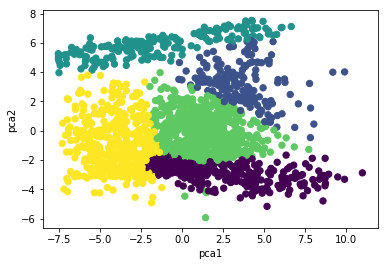

sample prediction:
 [[0.    0.319 0.    0.68  0.001]
 [0.    0.01  0.976 0.006 0.008]
 [0.    0.239 0.761 0.    0.   ]
 [0.415 0.001 0.    0.103 0.481]
 [0.225 0.012 0.    0.552 0.212]]


In [53]:
do_GMM(principalComponents,0,1,'pca1','pca2',5)


### 24.2. Take original dataset as input: 2D clustering

Input dimension: 2, nCluster: 5


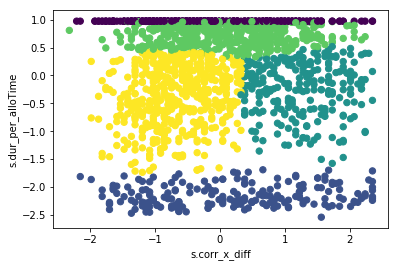

sample prediction:
 [[0.    0.    0.002 0.    0.998]
 [0.    0.992 0.005 0.    0.003]
 [0.    0.985 0.    0.    0.015]
 [0.051 0.    0.071 0.851 0.027]
 [0.    0.    0.018 0.826 0.156]]


In [54]:
x_,y_ = 's.corr_x_diff','s.dur_per_alloTime'

df = df_to_cluster_all[[x_,y_]]
x_col_index = df.columns.get_loc(x_)
y_col_index = df.columns.get_loc(y_)

do_GMM(df.values,x_col_index,y_col_index,x_,y_,5)

### 24.3. Take original dataset as input: Multi-D clustering

Input dimension: 3, nCluster: 5


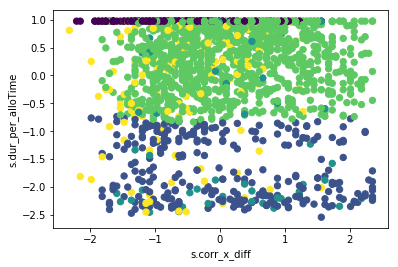

sample prediction:
 [[0.    0.043 0.    0.957 0.   ]
 [0.    0.999 0.    0.001 0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.001 0.    0.999 0.   ]]


In [55]:
x_,y_ = 's.corr_x_diff','s.dur_per_alloTime'

df = df_to_cluster_all[['s.corr_x_diff','s.dur_per_alloTime','s.blank']]
x_col_index = df.columns.get_loc(x_)
y_col_index = df.columns.get_loc(y_)

do_GMM(df.values,x_col_index,y_col_index,x_,y_,5)

## 25. Visualisation: t-SNE

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1754 samples in 0.002s...
[t-SNE] Computed neighbors for 1754 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1754
[t-SNE] Computed conditional probabilities for sample 1754 / 1754
[t-SNE] Mean sigma: 1.498180
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.425507
[t-SNE] KL divergence after 300 iterations: 1.473977
t-SNE done! Time elapsed: 3.4035630226135254 seconds


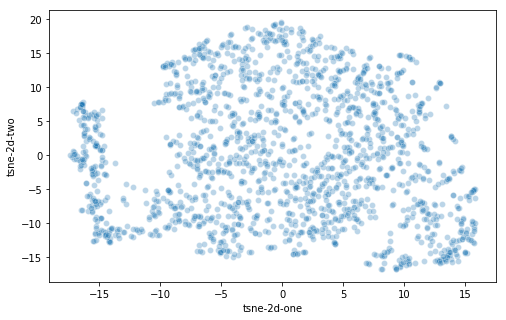

In [56]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=300)
tsne_results = tsne.fit_transform(df_to_cluster_all.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = pd.DataFrame()
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_tsne,
    legend="full",
    alpha=0.3
)


The t-SNE plot above does not seem to indicates any clear "natural" groupings.

## 26. Quantile grouping

Since there is no obvious natural grouping, lets try to to group based on percentile in terms of performance and time.

In [57]:
features = [
 's.corr_x_diff',
#  's.correct',
#  's.correct_d1',
#  's.correct_d2',
#  's.correct_d3',
#  's.incorrect',
#  's.blank',
 's.dur_per_alloTime',
#  's.duration_qsum'
 'keyId6.corr_x_diff',
 'keyId6.dur_per_alloTime',
 'keyId7.corr_x_diff',
 'keyId7.dur_per_alloTime',
 'keyId8.corr_x_diff',
 'keyId8.dur_per_alloTime',
 'keyId9.corr_x_diff',
 'keyId9.dur_per_alloTime',
 'keyId18.corr_x_diff',
 'keyId18.dur_per_alloTime',
  ]

In [58]:

def create_groups(df,col1,col2):

    top_25perc_corr = df[col1].quantile(0.75)
    bottom_25perc_corr = df[col1].quantile(0.25)

    top_25perc_time = df[col2].quantile(0.75)
    bottom_25perc_time = df[col2].quantile(0.25)

    df['hue'] = "allgroup" #initialize

    corr_bottom = (df[col1]<bottom_25perc_corr)
    corr_mid = (df[col1]>=bottom_25perc_corr) & (df[col1]<top_25perc_corr)
    corr_top = (df[col1]>=top_25perc_corr)

    time_bottom = (df[col2]<bottom_25perc_time)
    time_mid = (df[col2]>=bottom_25perc_time) & (df[col2]<top_25perc_time)
    time_top = (df[col2]>=top_25perc_time)

    df.loc[time_top & corr_bottom,'hue'] = "group1"
    df.loc[time_top & corr_mid,'hue'] = "group2"
    df.loc[time_top & corr_top,'hue'] = "group3"

    df.loc[time_mid & corr_bottom,'hue'] = "group4"
    df.loc[time_mid & corr_mid,'hue'] = "group5"
    df.loc[time_mid & corr_top,'hue'] = "group6"

    df.loc[time_bottom & corr_bottom,'hue'] = "group7"
    df.loc[time_bottom & corr_mid,'hue'] = "group8"
    df.loc[time_bottom & corr_top,'hue'] = "group9"



In [59]:
def draw_per_topic(df,Id):
    
    col1 = 'keyId'+str(Id)+'.corr_x_diff'
    col2 = 'keyId'+str(Id)+'.dur_per_alloTime'

    create_groups(df,col1,col2)

    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(x=col1, y=col2, hue="hue",
        palette=sns.color_palette("hls", 9),
        data=df[features+['hue']],
        legend="full",
    )

    title = keywordId_map.loc[Id,:].index.to_list()[0]
    ax.set_title(title)


/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


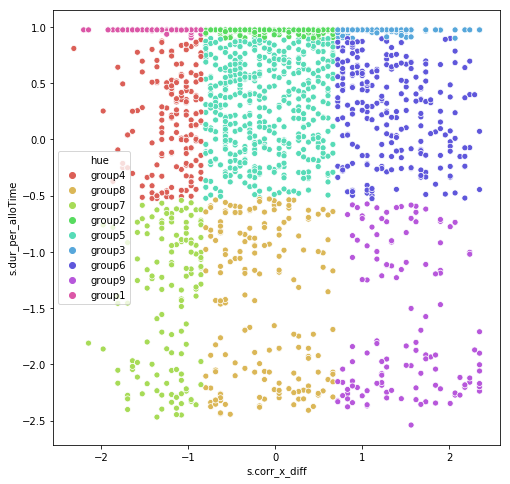

In [60]:
create_groups(df_to_cluster_all,'s.corr_x_diff','s.dur_per_alloTime')

#sns.pairplot(df_to_cluster_all[['s.corr_x_diff','s.durQsum_per_alloTime']+['hue']],hue="hue")

plt.figure(figsize=(8,8))
sns.scatterplot(x='s.corr_x_diff', y='s.dur_per_alloTime', hue="hue",
    palette=sns.color_palette("hls", 9),
    data=df_to_cluster_all[features+['hue']],
    legend="full",
)


### 26.1 Grouping per topic

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


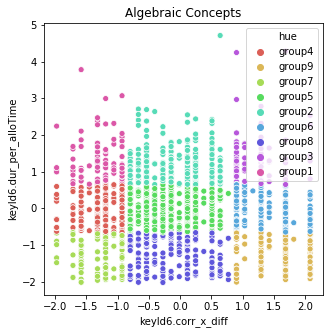

In [61]:
draw_per_topic(df_to_cluster_all,6)

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


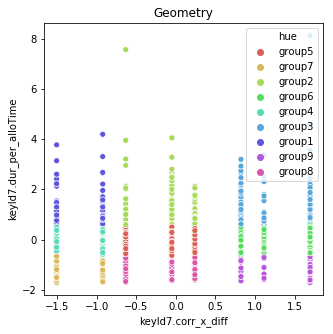

In [62]:
draw_per_topic(df_to_cluster_all,7)

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


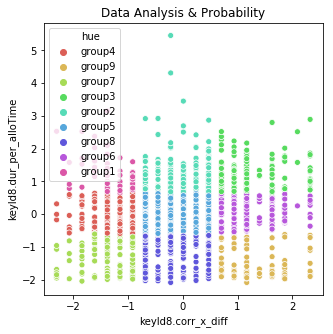

In [63]:
draw_per_topic(df_to_cluster_all,8)

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


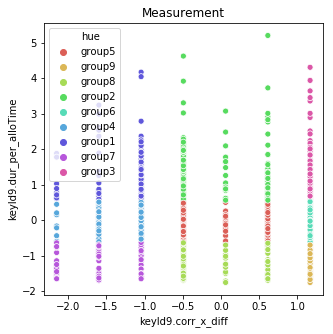

In [64]:
draw_per_topic(df_to_cluster_all,9)

/anaconda2/envs/TestInnovator_clusterStudents_py3/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


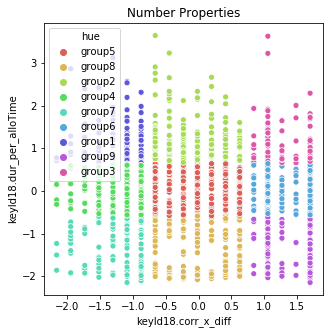

In [65]:
draw_per_topic(df_to_cluster_all,18)

# SUMMARY:

### Section 1-21:

- These sections are mostly efforts to explore, understand the data, clean and wrangle the data and create new features.

### Section 22-26:

- In these sections I applied several algorithms on the wrangled data.
- First I applied PCA to learn which variables would be responsible for maximizing the variance, in order to possibly help in visualizing the clustering, also to reduce the dimensions/number of features.
- I found that PCA component 1 is most correlated with measures of the number of correct answers and PCA component 2 is  most correlated to measure of the time performance.
- For the clustering algorithm I considered DBSCAN (which is density based clustering) and GMM clustering algorithms (which essentially fits "ellipses" on the data).
- Clustering based on the reduced PCA dimensions nor original dimensions, "natural" clustering is not found.
- DBSCAN is based on density, does not require number of clusters as input. Number of resulting cluster seems arbitrary despite parameter tunings.
- Gaussian Mixture fits multiple gaussians / ellipses to the data. Takes number of clusters as input. The results are also not intuituve and despite being easier to interpret. 
- I also applied t-SNE to the data, to help reveal any multi dimensional groupings. However the plot, again, does reveal any "natural" groupings 
- In the end I performed manually group based on quantiles and separating based on keywordId/topic.

## Conclusions

- With the current (limited) study, the "natural" groups does not emerge naturally.
- The ML aided clustering results as shown lacks clear interpretation and the clusterings are highly dependent on the parameters of the model.
- Domain knowlegde seems to be needed to better guide the clustering. 
- Based on the results, for this short project, a naive clustering/grouping approach based on quantile is chosen.
- With quantile based gropuping it is relatively simple to add new datapoints group them in to the appropriate quantile intervals.  
- In terms of visualizations, I propose color coding the groups and highlight where a student belong to identify their strength and weaknesses / where they are in the group. This can be separated into different topics (as done in this note) / question type / difficulty / etc. This will hopefully help the students identify which group they belong to allow them to progress to a desired grouping.